In [ ]:
import pandas as pd

In [ ]:

emas = pd.read_csv('FINAL_USO.csv')
emas = emas.rename(columns={'Close': 'Price'})


emas['DayOfWeek'] = pd.to_datetime(emas['Date']).dt.dayofweek


data = emas[['Open', 'High', 'Low', 'DayOfWeek', 'Price']]


data = data.dropna()


x = data[['Open', 'High', 'Low', 'DayOfWeek']].values
y = data['Price'].values

print(emas)


            Date        Open        High         Low       Price   Adj Close  \
0     2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1     2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2     2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3     2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4     2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
...          ...         ...         ...         ...         ...         ...   
1713  2018-12-24  119.570000  120.139999  119.570000  120.019997  120.019997   
1714  2018-12-26  120.620003  121.000000  119.570000  119.660004  119.660004   
1715  2018-12-27  120.570000  120.900002  120.139999  120.570000  120.570000   
1716  2018-12-28  120.800003  121.080002  120.720001  121.059998  121.059998   
1717  2018-12-31  120.980003  121.260002  120.830002  121.250000  121.250000   

        Volume     SP_open     SP_high 

In [ ]:
data = pd.DataFrame(emas, columns=['Open', 'High', 'Low', 'Price'])

x = data.iloc[:, 0:3].values
y = data.iloc[:, -1].values

print(x)
print(y)

[[154.740005 154.949997 151.710007]
 [154.309998 155.369995 153.899994]
 [155.479996 155.860001 154.360001]
 ...
 [120.57     120.900002 120.139999]
 [120.800003 121.080002 120.720001]
 [120.980003 121.260002 120.830002]]
[152.330002 155.229996 154.869995 ... 120.57     121.059998 121.25    ]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=3, activation='relu'))
model.add(tf.keras.layers.Dense(units=9, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001))

model.fit(x_train, y_train, epochs=800, batch_size=128)

Epoch 1/800
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 895.7296 
Epoch 2/800
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 408.5644 
Epoch 3/800
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 122.3969 
Epoch 4/800
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.4902 
Epoch 5/800
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8316 
Epoch 6/800
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1869 
Epoch 7/800
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7136 
Epoch 8/800
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4132 
Epoch 9/800
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3365 
Epoch 10/800
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3321 
Epoch 11/800
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3115 
Epoch 12/800
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3154 
Epoch 13/800
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3121 
Epoch 14/800
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3036 
Epoch 15/800
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [ ]:
import matplotlib.pyplot as plt
print(model.predict(x_test))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[119.66635 ]
 [117.24593 ]
 [116.2839  ]
 [102.242546]
 [116.53079 ]
 [126.921684]
 [156.1566  ]
 [112.06521 ]
 [119.22167 ]
 [120.53129 ]
 [115.52833 ]
 [152.10095 ]
 [107.1744  ]
 [126.944214]
 [132.04715 ]
 [111.87488 ]
 [117.56488 ]
 [119.31799 ]
 [105.149864]
 [133.94395 ]
 [161.36746 ]
 [118.47853 ]
 [163.55222 ]
 [152.71141 ]
 [116.397835]
 [135.42503 ]
 [122.956635]
 [122.20898 ]
 [122.704796]
 [103.72901 ]
 [154.11118 ]
 [133.34412 ]
 [113.35159 ]
 [116.20209 ]
 [124.75036 ]
 [157.72662 ]
 [113.2404  ]
 [167.6567  ]
 [111.16001 ]
 [116.51209 ]
 [116.77175 ]
 [112.66317 ]
 [122.82731 ]
 [127.43055 ]
 [114.72174 ]
 [112.45403 ]
 [160.32956 ]
 [124.42443 ]
 [128.5052  ]
 [119.36955 ]
 [172.0307  ]
 [156.4959  ]
 [172.34076 ]
 [120.35795 ]
 [119.60191 ]
 [162.10725 ]
 [161.78723 ]
 [120.39487 ]
 [126.487465]
 [118.867134]
 [115.00788 ]
 [114.08486 ]
 [159.40805 ]
 [123.78449 ]
 [120.13793 ]
 [125.193085]
 [114.60793 ]
 [155.54562 ]
 [105.07

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


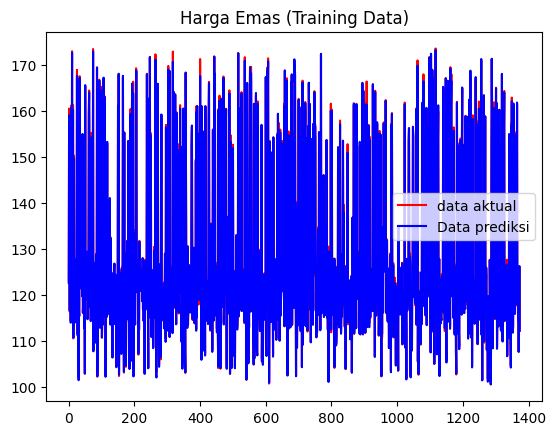

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


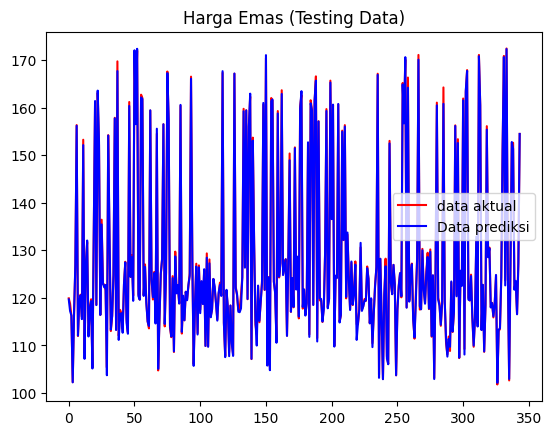

In [ ]:
y_train_pred = model.predict(x_train)


plt.plot(y_train, color='red', label='data aktual')
plt.plot(y_train_pred, color='blue', label='Data prediksi')
plt.title('Harga Emas (Training Data)')
plt.legend()
plt.show()


y_test_pred = model.predict(x_test)

plt.plot(y_test, color='red', label='data aktual')
plt.plot(y_test_pred, color='blue', label='Data prediksi')
plt.title('Harga Emas (Testing Data)')
plt.legend()
plt.show()